In [682]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

Load the TSV file containing information about titles:

In [654]:
ratings_dtype = {
    'tconst': str,
    'averageRating': float,
    'numVotes': int
}

ratings = pd.read_csv('./title.ratings.tsv.gz',
                      sep='\t', header=0, dtype=ratings_dtype)

In [655]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1383
1,tt0000002,6.5,162
2,tt0000003,6.6,971
3,tt0000004,6.4,98
4,tt0000005,6.2,1663


Load TSV file containing IMDb rating and votes information for titles:

In [656]:
title_dtype = {
    'tconst': str,
    'titleType': str,
    'primaryTitle': str,
    'originalTitle': str,
    'isAdult': int,
    'startYear': str,
    'endYear': str,
    'runtimeMinutes': object,
    'genres': str
}

title = pd.read_csv('./title.basics.tsv.gz',
                    sep='\t', header=0, dtype=title_dtype)

In [657]:
title.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


What are the types of titles?

In [658]:
title['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

Create variable containing TV series:

In [659]:
series = title[title['titleType'] == 'tvSeries']

In [660]:
series.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34995,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943,1947,15,\N
37626,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1950,15,\N
38460,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"Family,Game-Show"
38461,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family
38462,tt0039122,tvSeries,The Borden Show,The Borden Show,0,1947,\N,30,"Comedy,Music"


Get all the unique genres the TV series belong to:

In [661]:
genres_with_dupes = series['genres'].map(lambda x: [] if x == '\\N' else x.split(','))
genres_with_dupes_list = [y for x in genres_with_dupes for y in x]
genres = list(set(genres_with_dupes_list))
genres

['Action',
 'Fantasy',
 'News',
 'Romance',
 'Sport',
 'Thriller',
 'Family',
 'Documentary',
 'Short',
 'Biography',
 'Western',
 'Adventure',
 'History',
 'Musical',
 'Animation',
 'Adult',
 'Sci-Fi',
 'Game-Show',
 'Drama',
 'Mystery',
 'War',
 'Music',
 'Talk-Show',
 'Comedy',
 'Reality-TV',
 'Horror',
 'Crime']

Set genres column in series dataframe to array of genres:

In [662]:
# To get rid of SettingWithCopyWarning. See https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
series.is_copy = False

series['genres'] = genres_with_dupes
series.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34995,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943,1947,15,[]
37626,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1950,15,[]
38460,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"[Family, Game-Show]"
38461,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,[Family]
38462,tt0039122,tvSeries,The Borden Show,The Borden Show,0,1947,\N,30,"[Comedy, Music]"


We want counts of genres per start year, so let's create a data structure with a form like this:
```
{
  '1947': {
    'Action': 92,
    'Adult': 11,
    'Adventure': 91
  }
}
```

In [663]:
start_years = [i for i in title['startYear'].unique() if i != '\\N']
title['startYear'].unique()

array(['1894', '1892', '1893', '1895', '1896', '1898', '1897', '1900',
       '1899', '1901', '1904', '1903', '1902', '1905', '1912', '1907',
       '1906', '1908', '1910', '1909', '1914', '1911', '1913', '1915',
       '1919', '1916', '1917', '1918', '1936', '1925', '1920', '1922',
       '1921', '1923', '1924', '1928', '1926', '1927', '1929', '1993',
       '1935', '1930', '1942', '1933', '1934', '1931', '1939', '1932',
       '1950', '1938', '1951', '1937', '1945', '1983', '1946', '1940',
       '1944', '1949', '1941', '1952', '1970', '1957', '1943', '1948',
       '1959', '2001', '1947', '1953', '1954', '1965', '1973', '1961',
       '1995', '1955', '1962', '1958', '1956', '1964', '1960', '1967',
       '1968', '1963', '1972', '1969', '1985', '1971', '1966', '1976',
       '1986', '1990', '1977', '1979', '1978', '1981', '1988', '1975',
       '1974', '1989', '2016', '\\N', '1980', '2010', '2018', '1984',
       '1982', '1991', '1987', '1992', '1994', '1999', '2005', '1998',
       

In [664]:
def count_genres(year):
  matches = series.loc[series['startYear'] == year]
  gs = [y for x in matches['genres'] for y in x if y != '\\N']
  return {x: gs.count(x) for x in gs}

genres_by_year = []
for yr in start_years:
  gc = count_genres(yr)
  if bool(gc): genres_by_year.append((yr,gc))

In [665]:
genres_by_year[1:5]

[('1910', {'News': 1}),
 ('1916', {'Talk-Show': 1}),
 ('1936', {'Comedy': 3, 'Family': 1, 'Music': 3, 'Sport': 1, 'Talk-Show': 1}),
 ('1922', {'News': 1})]

In [666]:
genre_ratios = pd.Series(genres_with_dupes_list).value_counts()
# Flip values
# genre_ratios = pd.Series(genre_ratios.index.values, index=genre_ratios)
genre_ratios.head()

Comedy         36302
Drama          23299
Documentary    16715
Reality-TV     13859
Talk-Show      11077
dtype: int64

### Genre counts across all TV series ever made:

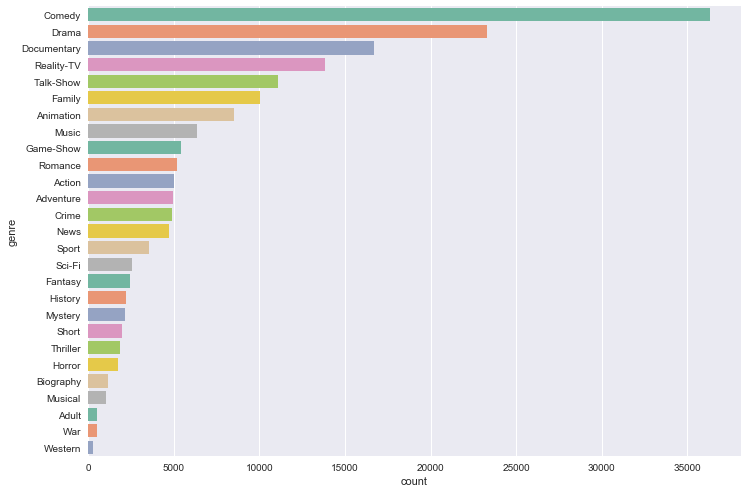

In [667]:
d = pd.DataFrame(data={'genre': genres_with_dupes_list})
ax = sns.countplot(y='genre', data=d, palette='Set2', order = d['genre'].value_counts().index)

Plot comedy across the years:

In [668]:
def plot_genre(genre):
  gs = []
  for j in genres_by_year:
    if genre in j[1] and int(j[0]) > 1980 and int(j[0]) < 2018:
      gs.append((j[0], j[1][genre]))
    
  sorted(gs, key=lambda x: int(x[0]))

  xs, ys = zip(*gs)

  x, y = pd.Series(xs, name='Years'), pd.Series(ys, name=genre)
  ax = sns.regplot(x=x, y=y, color='g', fit_reg=False)

  for l in ax.get_xticklabels():
    l.set_rotation(45)

### How many Comedy series are released each year?

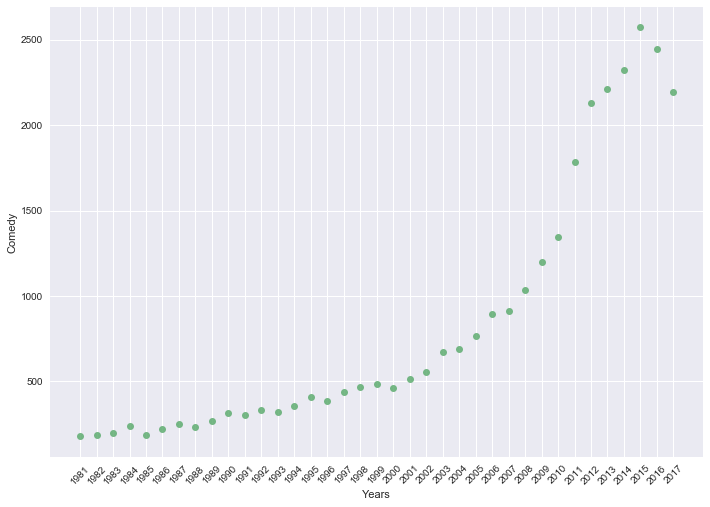

In [669]:
plot_genre('Comedy')

### How many Drama series are released each year?

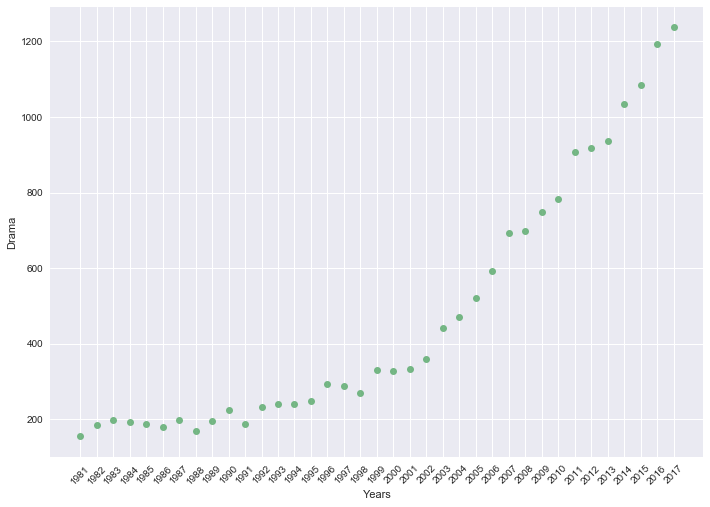

In [670]:
plot_genre('Drama')

### How many Reality TV series are released each year?

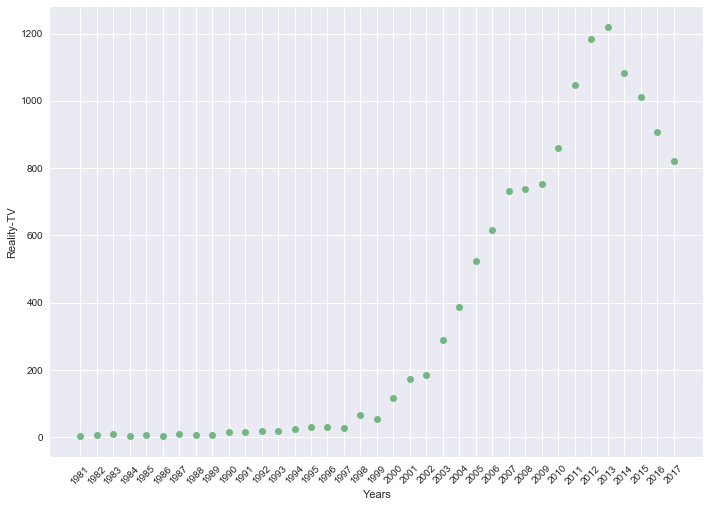

In [671]:
plot_genre('Reality-TV')

### How many Documentary series are released each year?

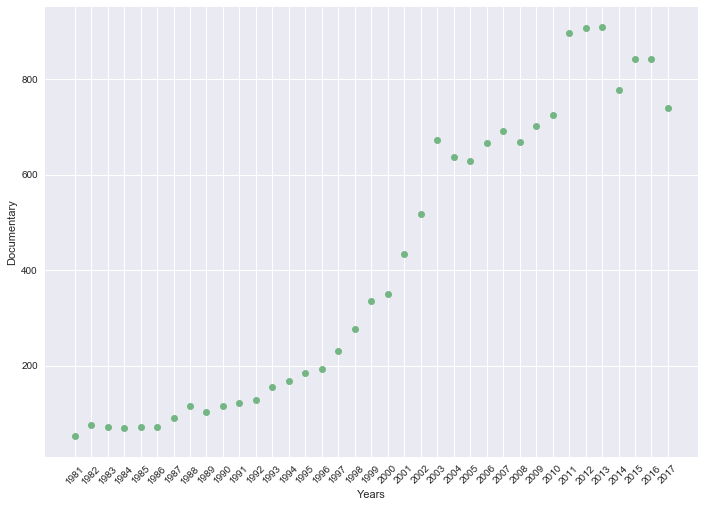

In [672]:
plot_genre('Documentary')

### How many Talk Show series are released each year?

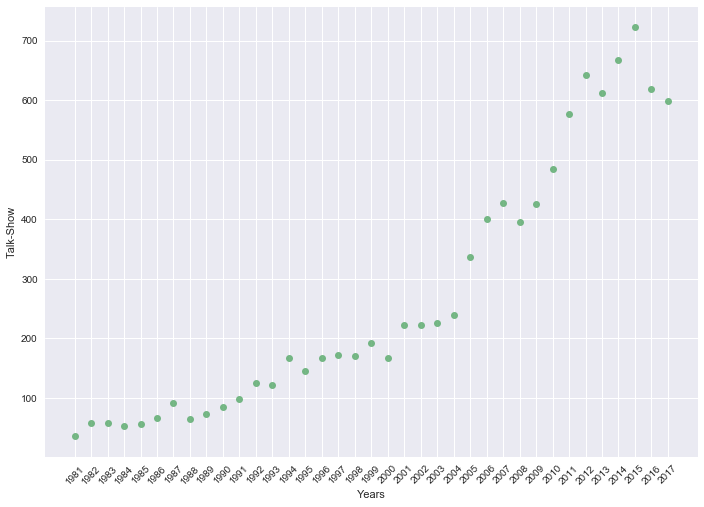

In [673]:
plot_genre('Talk-Show')

### What are the percentages of TV Genres over the years?

Create data frame of genres in long form:

In [763]:
df1 = series[['startYear', 'genres']].dropna(subset=['startYear'])
df1 = df1[df1['startYear'] != '\\N']
pd.to_numeric(df1['startYear'])
df1 = pd.DataFrame(df1['genres'].tolist(), index=df1['startYear']).stack().reset_index(name='genres')[['genres','startYear']]
df1.tail()

,genres,startYear
174041,Talk-Show,2018
174042,Documentary,2018
174043,Sci-Fi,2019
174044,Adult,2005
174045,Crime,2018


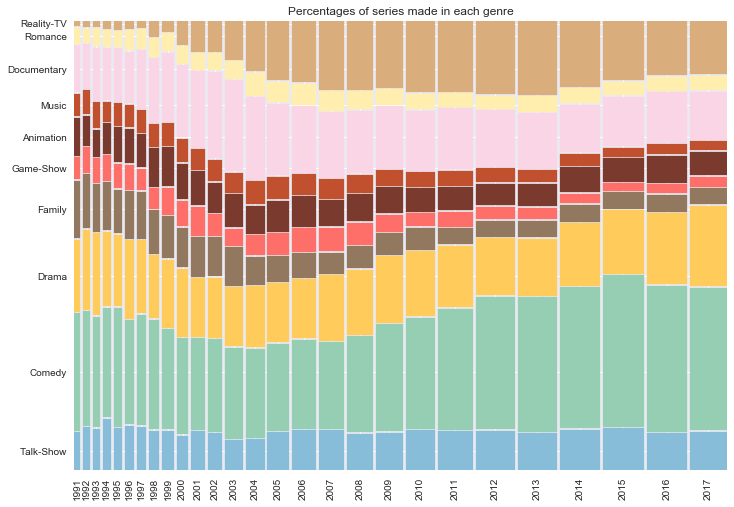

In [766]:
top_10_genres = genre_ratios[:10].index.values
df1['startYear'] = pd.to_numeric(df1['startYear'])
df1 = df1[df1['startYear'] > 1989]
df1 = df1[df1['startYear'] < 2018]
df1 = df1[df1['genres'].isin(top_10_genres)]

hexs = ["#96ceb4", "#ffcc5c", "#f9d5e5", "#d9ad7c", "#87bdd8",
          "#937860", "#7a3b2e", "#c1502e", "#ff6f69", "#ffeead"]

colors = {}
for g, c in zip(top_10_genres, hexs):
  colors[g] = c

props = lambda key: {'color': colors[key[1]]}
ax, _ = mosaic(df1.sort_values('startYear'), ['startYear', 'genres'], label_rotation=(90,0),
              labelizer=(lambda _: ''), properties=props, title='Percentages of series made in each genre')

plt.show()

## Running Years of TV Series

Figure out the series that we know ran to completion and their durations:

In [676]:
df = series[series['startYear'] != '\\N']
df = df[df['endYear'] != '\\N']
df = df.dropna(subset=['startYear', 'endYear', 'primaryTitle'], how='any')
df['runningYears'] = pd.to_numeric(df['endYear']) - pd.to_numeric(df['startYear'])
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,runningYears
34995,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943,1947,15,[],4
37626,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1950,15,[],4
38460,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"[Family, Game-Show]",2
38461,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,[Family],2
38463,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,[Drama],11


### What are the average running years for genres?

In [683]:
def plot_genre_average(df, col_to_avg, x_label, y_label):
  vals_to_avg = []

  for g in genres:
    f = df[df.genres.apply(lambda x: g in x)]
    vals_to_avg.append((g, f[col_to_avg].mean()))

    xs, ys = zip(*vals_to_avg)

  d = pd.DataFrame(data={y_label: xs, x_label: ys})
  d = d.sort_values(by=[x_label], ascending=False)

  ax = sns.barplot(y=y_label, x=x_label, data=d)
  ax.set(xlim=(0, 10))
  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

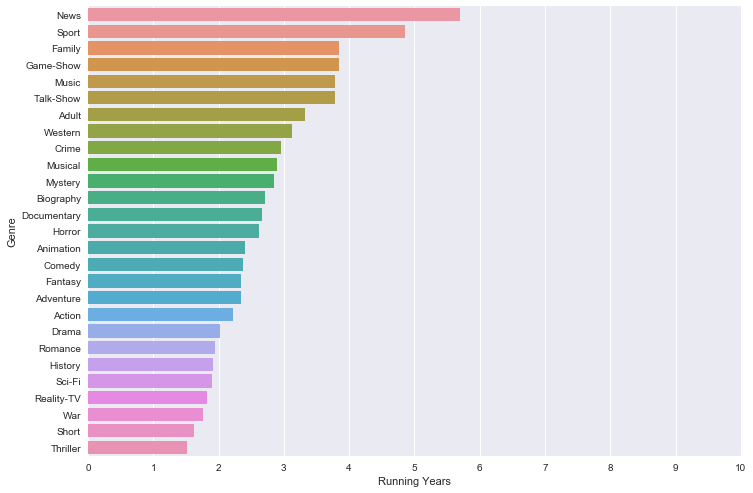

In [684]:
plot_genre_average(df, 'runningYears', 'Running Years', 'Genre')

### What are the average ratings for genres?
First, let's add ratings information to TV series:

In [679]:
series_with_ratings = pd.merge(series, ratings, how='outer', on=['tconst'])
# Drop rows that do not have a genre or rating
series_with_ratings = series_with_ratings.dropna(subset=['genres', 'averageRating'], how='any')
series_with_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
2,tt0039120,tvSeries,Americana,Americana,0.0,1947,1949,30,"[Family, Game-Show]",3.7,6.0
5,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0.0,1947,1958,60,[Drama],8.5,108.0
7,tt0039125,tvSeries,Public Prosecutor,Public Prosecutor,0.0,1947,1951,20,"[Crime, Drama, Mystery]",5.9,7.0
8,tt0040021,tvSeries,Actor's Studio,Actor's Studio,0.0,1948,1950,30,[Drama],7.1,48.0
15,tt0040028,tvSeries,Talent Scouts,Talent Scouts,0.0,1948,1958,30,"[Comedy, Family, Music]",6.1,11.0


### Average Genre Ratings

Calculate average ratings for each genre:

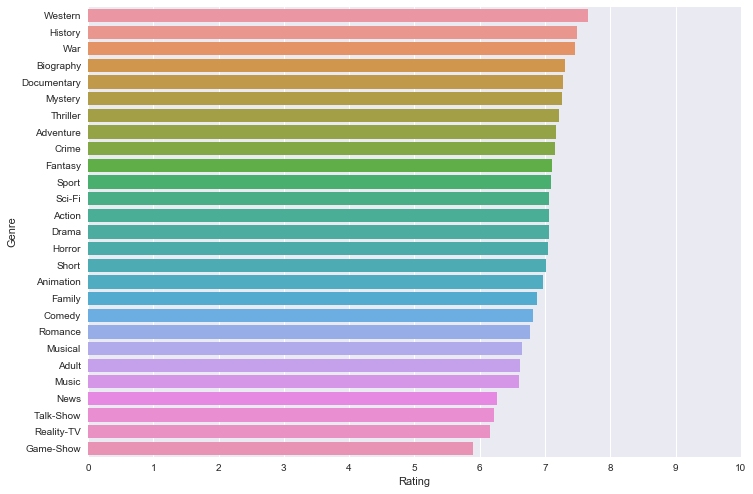

In [680]:
plot_genre_average(series_with_ratings, 'averageRating', 'Rating', 'Genre')